# Funções Auxiliares e Imports

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as random
from scipy.stats import pearsonr
from scipy import stats

file_path = "C:/Users/gabri/Downloads/Redes Complexas/"

## Lendo e plotando o grafo dos dados

### Base Hamsterster

In [4]:
# Base de dados para a questão 1
ham = nx.read_edgelist(file_path + "data/hamsterster.txt")

# plt.figure(figsize=(12,10))
# pos = nx.spring_layout(ham)
# nx.draw(ham, pos, node_color="lightgray", node_size=500, with_labels=True)

### Base USairport500

In [5]:
# Base de dados para a questão 2 e 4
usa = nx.read_edgelist(file_path + "data/USairport500.txt")

# plt.figure(figsize=(12,10))
# pos = nx.spring_layout(usa)
# nx.draw(usa, pos, node_color="lightgray", node_size=50, with_labels=True)

### Base Advogato

In [6]:
# Base de dados para a questão 3
adv = nx.read_edgelist(file_path + "data/advogato.txt")

# plt.figure(figsize=(12,10))
# pos = nx.spring_layout(adv)
# nx.draw(adv, pos, node_color="lightgray", node_size=500, with_labels=True)

### Base Word_Adjacencies

In [7]:
# Base de dados para as questões 4 e 5
word = nx.read_weighted_edgelist(file_path + "data/word_adjacencies.txt")

# plt.figure(figsize=(12,10))
# pos = nx.spring_layout(word)
# nx.draw(word, pos, node_color="lightgray", node_size=500, with_labels=True)

### Padronização da Rede

In [8]:
# Função que "padroniza" a rede, transformando-a em uma rede sem direção, e retornando o maior componente conectado para a análise.
def padronizar_rede(G):
    # Transformamos o grafo em uma rede sem direção.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))

    # Vamos selecionar apenas o maior componente conectado.
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])

    # Transformando os labels para números inteiros, começando com 0:

    G = nx.convert_node_labels_to_integers(G, first_label=0)

    # Número de vértices e arestas:

    N = len(G)
    M = G.number_of_edges()
    print('Number of nodes:', N)
    print('Number of edges:', M)
    return G



## Funções do Questionário 1

### Cálculo do Grau Médio

In [9]:
# Função para calcular o grau médio do grafo.
def mean_degree(G):
    vk = dict(G.degree()).values()
    vk = np.array(list(vk))
    print('Degree', vk)



    md = np.mean(vk)
    # print('Mean degree: ', md)
    return md



### Cálculo da Distribuição do Grau

In [10]:
# Função para calcular a distribuição do grau do grafo.
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

# Função para calcular o momento da distribuição do grau do grafo.
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

# Função para calcular a variância do grau.
def variance(G):
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    return variance
# print("Variância do grau = ", variance)

### Cálculo do Momento do Grau

In [11]:
# Função para calcular o momento do grafo.
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

### Cálculo da Entropia de Shannon

In [12]:
# Função para calcular a entropia de Shannon do grafo.
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*np.math.log(p, 2)
    return H

# Função para calcular a entropia de Shannon normalizada do grafo.
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*np.math.log(p, 2)
    return H/np.math.log(len(G),2)

### Cálculo da Transitividade e do Coeficiente de Agrupamento

In [13]:
# Função para calcular o coeficiente de transitividade do grafo.
def graph_transitivity(G):
    CC = (nx.transitivity(G))
    # print("Transitivity = ","%3.4f"%CC)
    return "%3.4f"%CC

# Função para calcular o coeficiente de agrupamento do grafo.
def avg_clustering_coefficient(G):
    avc = nx.average_clustering(G)
    # print("Average clustering:", "%3.4f"%avc)
    return "%3.4f"%avc

## Funções do Questionário 2

### Distâncias

In [ ]:
# Função para calcular e plotar a distribuição de grau da rede.
def graph_avg_distance(G):

    if nx.is_connected(G) == True:
        l = nx.average_shortest_path_length(G)
        print("Average shortest path length:", "%3.4f"%l)
    else:
        print("The graph has more than one connected component")
    return "%3.4f"%l
    

# Função para calcular o diâmetro do grafo.
def graph_diameter(G):
    d = nx.diameter(G)
    print('Network diameter:', d)
    return d

# Função para calcular a eficiência global e local do grafo.
def graph_efficiency(G):

    E = nx.global_efficiency(G)
    print('Network efficiency', E)

    leff = nx.local_efficiency(G)
    print('The average local efficiency of the network:', leff)

# Função para calcular a distância geodésica do grafo.
def graph_geodesic_distance(G):
    N = len(G)
    d = graph_diameter(G)

    if nx.is_connected(G) == True:
        D = np.zeros(shape=(N,N)) # D is the matrix of distances
        vl = []
        for i in np.arange(0,N):
            for j in np.arange(i+1, N):
                if(i != j):
                    aux = nx.shortest_path(G,i,j)
                    dij = len(aux)-1
                    D[i][j] = dij
                    D[j][i] = dij
                    vl.append(dij)
        x = range(0,d+1)
        plt.hist(vl, bins = x, density=True, color='#0504aa',alpha=0.7, rwidth=0.85)
        plt.title("Distribution of the geodesic distances", fontsize=20)
        plt.ylabel("P(l)", fontsize=15)
        plt.xlabel("Shortest path length (l)", fontsize=15)
        #plt.grid(True)
        plt.savefig('av_short_path.svg')
        plt.show(True)
    else:
        print("The graph has more than one connected component")



### Cálculo da Correlação de Grau a Grau

In [ ]:
# Função para calcular e plotar a correlação de grau a grau (degree-degree correlation).
def degree_correlation(G):
    r=nx.degree_assortativity_coefficient(G)
    print("Assortativity = ","%3.4f"%r)

# Função para calcular a correlação de Pearson entre os graus dos nós.
def pearson_correlation(G):
    ki = []
    kj = []
    for i in range(0,len(G.nodes())):
        for j in range(0, len(G.nodes())):
            if(G.has_edge(i,j) == True):
                ki.append(G.degree(i))
                kj.append(G.degree(j))
                
    
    # calculate Pearson's correlation
    corr, _ = pearsonr(ki, kj)
    print('Pearsons correlation: %.3f' % corr)

# Função para calcular o grau médio de vizinhança (knn) do grafo.
def avg_neighbor_degree(G):

    knn = []
    for i in G.nodes():
        aux =  nx.average_neighbor_degree(G, nodes = [i])
        knn.append(float(aux[i]))
    knn = np.array(knn)
    print("Average degree of the neighborhood of the network:", "%3.2f"%np.mean(knn))
    return knn


# Função para calcular a correlação entre conectividade média da vizinhança
#  e grau do nó. Positiva em redes sortidas, negativa em redes assortativas.
def avc_assnet_degree(G):
    knn = avg_neighbor_degree(G)

    vk = dict(G.degree())
    vk = list(vk.values())



    knnk = list()
    ks = list()
    for k in np.arange(np.min(vk), np.max(vk)+1):
        aux = vk == k
        if(len(knn[aux]) > 0):
            av_knn = np.mean(knn[aux]) #average clustering among all the nodes with degree k
            knnk.append(av_knn)
            ks.append(k)
    fig= plt.figure(figsize=(10,6))

    plt.plot(ks, knnk, '-o', color='gray',markersize=10, linewidth=0,
            markerfacecolor='lightgray',
            markeredgecolor='black',
            markeredgewidth=2)
    #plt.loglog(ks,knnk,'bo',basex=10,basey=10)
    #plt.title("Average neighborhood connectivity vs degree")
    plt.ylabel("knn(k)", fontsize = 20)
    plt.xlabel("k", fontsize = 20)
    #plt.savefig('knnk.eps')

    # determine best fit line
    par = np.polyfit(ks, knnk, 1, full=True)
    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(ks), max(ks)]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, '--', linewidth=3, color='black')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('knn.eps') #save the figure into a file
    plt.show(True)

    return ks, knnk

# Função para calcular o coeficiente de correlação de Pearson entre
#  o grau do nó e a conectividade média da vizinhança.
def pearson_correlation_knn(ks, knnk):
    rho = np.corrcoef(ks, knnk)[0,1]
    print('Pearson correlation coefficient:', rho)

# Função para calcular o coeficiente de correlação de Spearman entre
#  o grau do nó e a conectividade média da vizinhança.
def spearman_correlation_knn(ks, knnk):
    s = stats.spearmanr(ks, knnk)
    print('Spearman rank correlation coefficient:', s)

### Caminhadas Aleatórias

In [16]:
# Função para realizar caminhadas aleatórias no grafo
def random_walk(G, T, seed_node):
    
    # neighbors
    ng = G.neighbors(seed_node)
    walk = []
    for t in range(0,T):
        next_node = random.choice(list(ng))
        ng = G.neighbors(next_node)
        walk.append(next_node)
    print('Walk:', walk)



    nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = nx.spring_layout(G))
    plt.show(True)

    A = nx.to_numpy_array(G)
    print(A)
    print('Number of walks of length two:')
    print(A@A)



## Funções do Questionário 3

In [ ]:
def network_centrality(G):
    vk = dict(G.degree())
    vk = list(vk.values())
    print('Degree centrality', vk)
    return vk

def centrality_distribution(vk):
    plt.figure(figsize=(6,4))
    plt.hist(vk, density=True)
    plt.title("Distribution of the Degree Centrality", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.xlabel("Degree Centrality (k)", fontsize=20)
    #plt.grid(True)
    plt.savefig('degree-centrality.eps')
    plt.show(True)

def closeness_centrality(G):
    clc = dict(nx.closeness_centrality(G))
    print('Closeness centrality', clc)

    clc = list(clc.values())
    av_clc = np.mean(clc)
    print('Average closeness centrality', av_clc)

    
    # Destribuição de Closeness Centrality
    plt.figure(figsize=(6,4))
    plt.hist(clc, density=True)
    plt.title("Distribution of the Closeness Centrality", fontsize=20)
    plt.ylabel("P(CLC)", fontsize=20)
    plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
    plt.savefig('closeness.eps')
    plt.show(True)


    return clc, av_clc

def betweenness_centrality(G):
    btc = dict(nx.betweenness_centrality(G))
    print('Betweenness centrality', btc)

    btc = list(btc.values())
    av_btc = np.mean(btc)
    print('Average betweenness centrality', av_btc)

    
    # Destribuição de Betweenness Centrality
    plt.figure(figsize=(6,4))
    plt.hist(btc, density=True)
    plt.title("Distribution of the Betweenness Centrality", fontsize=20)
    plt.ylabel("P(BTC)", fontsize=20)
    plt.xlabel("Betweenness Centrality (BTC)", fontsize=20)
    plt.savefig('betweenness.eps')
    plt.show(True)


    return btc, av_btc

def eigenvector_centrality(G):
    evec = dict(nx.eigenvector_centrality(G))
    print('Eigenvector centrality', evec)

    evec = list(evec.values())
    av_evec = np.mean(evec)
    print('Average eigenvector centrality', av_evec)

    
    # Destribuição de Eigenvector Centrality
    plt.figure(figsize=(6,4))
    plt.hist(evec, density=True)
    plt.title("Distribution of the Eigenvector Centrality", fontsize=20)
    plt.ylabel("P(EVC)", fontsize=20)
    plt.xlabel("Eigenvector Centrality (EVC)", fontsize=20)
    plt.savefig('eigenvector.eps')
    plt.show(True)


    return evec, av_evec

def pagerank(G):
    pr = dict(nx.pagerank(G, alpha=0.85))
    print('PageRank: ', pr)

    pr = list(pr.values())
    pr = np.array(pr)
    av_pr = np.mean(pr)
    print('Average PageRank centrality', av_pr)

    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())
    B = np.array(B)
    plt.figure(figsize=(6,4))
    plt.ylabel("Betweennees centrality", fontsize = 20)
    plt.xlabel("Page Rank", fontsize = 20)
    plt.plot(pr, B, 'ro')
    plt.show(True)

    # Destribuição de PageRank Centrality
    plt.figure(figsize=(6,4))
    plt.hist(pr, density=True)
    plt.title("Distribution of the PageRank Centrality", fontsize=20)
    plt.ylabel("P(PRC)", fontsize=20)
    plt.xlabel("PageRank Centrality (PRC)", fontsize=20)
    plt.savefig('pagerank.eps')
    plt.show(True)


    return pr, av_pr

# def k_core


# Questões

## Questão 1)

Para a rede social Hamsterster, calcule a média dos menores caminhos e o diâmetro. Considere apenas o maior componente.

In [ ]:
# Padronizo a rede para a análise
ham = padronizar_rede(ham)

# Calculo a distância média do grafo
l = graph_avg_distance(ham)

# Calculo o diâmetro do grafo
d = graph_diameter(ham)

Number of nodes: 1788
Number of edges: 12476
Average shortest path length: 3.4526
Network diameter: 14


## Questão 2)

Para a rede de aeroportos (base USairport500), calcule a média e variância do comprimento dos menores caminhos. Considere apenas o maior componente na rede.

In [ ]:
# Padronizo a rede para a análise
usa = padronizar_rede(usa)

# Salvo o número de nós do grafo
n_nodes = usa.number_of_nodes()

# Crio um array para armazenar os menores caminhos entre os nós, iniciando com zeros
shortest_path = np.zeros(n_nodes**2)

# Calculo o menor caminho entre todos os pares de nós do grafo
# e armazeno no array criado anteriormente
for node in range(n_nodes):
    for node2 in range(n_nodes):
        if node != node2:
            try:
                shortest_path[node*n_nodes + node2] = nx.shortest_path_length(usa, source=node, target=node2)
            except nx.NetworkXNoPath:
                shortest_path[node*n_nodes + node2] = np.inf

# Calculo a média e a variância dos menores caminhos
# excluindo os casos em que não há caminho entre os nós
print(f"Média dos menores caminhos: {np.mean(shortest_path[shortest_path != np.inf])}")
print(f"Variância dos menores caminhos: {np.var(shortest_path[shortest_path != np.inf])}")

Number of nodes: 500
Number of edges: 2980
Média dos menores caminhos: 2.985048
Variância dos menores caminhos: 0.833768437696


## Questão 3)

Calcule o coeficiente de assortatividade para a rede Advogato. Considere apenas o maior componente. Considere o valor mais próximo.

In [ ]:
# Padronizo a rede para a análise
adv = padronizar_rede(adv)

# Calculo o coeficiente de assortatividade do grafo
ass = degree_correlation(adv)

Number of nodes: 5042
Number of edges: 39227
Assortativity =  -0.0957


## Questão 4)

Para a rede de aeroportos (USairport500), calcule a entropia de Shannon considerando o comprimento dos menores caminhos. Use o logaritmo na base 2 e considere apenas o maior componente.

In [ ]:
# Crio um array para armazenar os caminhos finitos entre 
# os menores caminhos do grafo, desconsiderando caminhos inexistentes
finite_paths = shortest_path[shortest_path != np.inf]

# Salvo a frequência dos comprimentos
unique, counts = np.unique(finite_paths, return_counts=True)

# Calculo a probabilidade normalizada
P = counts / counts.sum()

# Calculo a entropia de Shannon do grafo
H = -np.sum(P * np.log2(P))

print(f"Entropia de Shannon dos menores caminhos: {H}")

Entropia de Shannon dos menores caminhos: 1.9007137451744507


## Questão 5)

Calcule o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau para a rede de palavras (word_adjacencies). Considere apenas o maior componente conectado.

Number of nodes: 112
Number of edges: 425
Average degree of the neighborhood of the network: 14.76


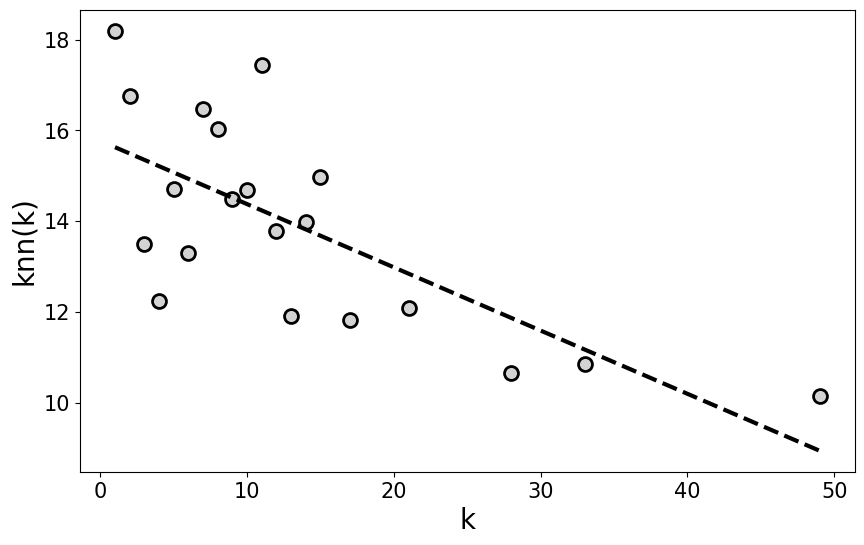

Pearson correlation coefficient: -0.710832214935246


In [ ]:
# Padronizo o grafo para a análise
word = padronizar_rede(word)

# Calculo o grau de cada nó e a conectividade média da vizinhança
ks, knnk = avc_assnet_degree(word)

# Calculo o coeficiente da correlação de Pearson entre os dois
pearson_correlation_knn(ks, knnk)
